#4.1

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('ASHOKA.csv')

ashoka_mean_14=df[['Average Price']].rolling(14,min_periods=1).mean()
ashoka_std_14=df[['Average Price']].rolling(14,min_periods=1).std()

df['upper'] = ashoka_mean_14 + 2*ashoka_std_14
df['lower'] = ashoka_mean_14 - 2*ashoka_std_14
df['middle']=ashoka_mean_14
df=df[1:]

print(df)

     Symbol Series         Date  ...       upper       lower      middle
1    ASHOKA     EQ  16-May-2017  ...  213.797670  212.072330  212.935000
2    ASHOKA     EQ  17-May-2017  ...  217.503875  210.389458  213.946667
3    ASHOKA     EQ  18-May-2017  ...  217.042629  209.747371  213.395000
4    ASHOKA     EQ  19-May-2017  ...  217.118858  208.293142  212.706000
5    ASHOKA     EQ  22-May-2017  ...  219.325629  203.221038  211.273333
..      ...    ...          ...  ...         ...         ...         ...
489  ASHOKA     EQ  07-May-2019  ...  136.915111  116.406318  126.660714
490  ASHOKA     EQ  08-May-2019  ...  136.838950  114.551050  125.695000
491  ASHOKA     EQ  09-May-2019  ...  136.610308  112.632549  124.621429
492  ASHOKA     EQ  10-May-2019  ...  135.461453  111.609976  123.535714
493  ASHOKA     EQ  13-May-2019  ...  133.452464  111.397536  122.425000

[493 rows x 18 columns]


In [ ]:
def call(row):
    if row['Close Price'] <= row['lower']: return 'Buy'
    if row['Close Price'] >= row['upper']: return 'Short'
    if row['Close Price'] <  row['middle']:   return 'Hold Buy/Liquidate Short'
    if row['Close Price'] >  row['middle']:   return 'Hold Short/Liquidate Buy'

df['Call'] = df.apply(call, axis=1)
print(df.head())

   Symbol Series         Date  ...       lower      middle                      Call
1  ASHOKA     EQ  16-May-2017  ...  212.072330  212.935000                     Short
2  ASHOKA     EQ  17-May-2017  ...  210.389458  213.946667  Hold Short/Liquidate Buy
3  ASHOKA     EQ  18-May-2017  ...  209.747371  213.395000                       Buy
4  ASHOKA     EQ  19-May-2017  ...  208.293142  212.706000                       Buy
5  ASHOKA     EQ  22-May-2017  ...  203.221038  211.273333                       Buy

[5 rows x 19 columns]


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

n = len(df)
dft = df[:int(n*0.8)]
dfte = df[int(n*0.8):]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10, 10), random_state=1,max_iter=600)
clf.fit(dft[['Close Price','lower','upper','middle']], dft['Call'])

accuracy_score(dfte['Call'], clf.predict(dfte[['Close Price','lower','upper','middle']]))


1.0

In [ ]:
df2 = pd.read_csv("BAJAJELEC.csv")

bajaj_mean_14=df2[['Average Price']].rolling(14,min_periods=1).mean()
bajaj_std_14=df2[['Average Price']].rolling(14,min_periods=1).std()

df2['upper'] = bajaj_mean_14 + 2*bajaj_std_14
df2['lower'] = bajaj_mean_14 - 2*bajaj_std_14
df2['middle'] = bajaj_mean_14
df2 = df2[1:]

df2['call'] = df2.apply(call, axis=1)

accuracy_score(df2['call'], clf.predict(df2[['Close Price','lower','upper','middle']]))

0.9918864097363083

##4.2

In [ ]:
import pandas as pd

df=pd.read_csv('ASHOKA.csv')
print(df.head())

   Symbol Series  ... Deliverable Qty  % Dly Qt to Traded Qty
0  ASHOKA     EQ  ...           88509                   55.32
1  ASHOKA     EQ  ...          151941                   71.26
2  ASHOKA     EQ  ...          261939                   68.37
3  ASHOKA     EQ  ...           35458                   45.05
4  ASHOKA     EQ  ...          301747                   75.68

[5 rows x 15 columns]


In [ ]:
df['oc'] = 100*(df['Close Price']-df['Open Price'])/df['Open Price']
df['lh'] = 100*(df['High Price']-df['Low Price'])/df['Low Price']
df['mean5']=df[['Close Price']].rolling(5,min_periods=1).mean()
df['std5']=df[['Close Price']].rolling(5,min_periods=1).std()
df=df[1:]
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,oc,lh,mean5,std5
1,ASHOKA,EQ,16-May-2017,216.05,212.3,216.00,211.00,214.00,214.90,213.24,213214,45466299.10,2860,151941,71.26,1.224682,2.369668,215.475000,0.813173
2,ASHOKA,EQ,17-May-2017,214.90,214.3,218.70,212.10,216.55,217.00,215.97,383131,82743402.10,3297,261939,68.37,1.259916,3.111740,215.983333,1.051586
3,ASHOKA,EQ,18-May-2017,217.00,216.0,216.60,208.00,210.00,209.65,211.74,78709,16665707.55,1372,35458,45.05,-2.939815,4.134615,214.400000,3.281006
4,ASHOKA,EQ,19-May-2017,209.65,212.1,213.90,205.05,206.05,206.25,209.95,398725,83713500.05,2060,301747,75.68,-2.758133,4.316020,212.770000,4.621499
5,ASHOKA,EQ,22-May-2017,206.25,208.5,209.15,198.95,201.05,201.60,204.11,126516,25822846.35,2941,86762,68.58,-3.309353,5.126916,209.880000,6.278595


In [ ]:
def action(row):
    if row['Close Price'] <= row['Prev Close']: 
      return 1
    else: 
      return -1

df['action'] = df.apply(action, axis=1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
n = len(df)

dft = df[:int(n*0.8)]
dfte = df[int(n*0.8):]

clf = RandomForestClassifier(random_state=0)
clf.fit(dft[['oc','lh','mean5','std5']], dft['action'])

accuracy_score(dfte['action'], clf.predict(dfte[['oc','lh','mean5','std5']]))

0.8585858585858586

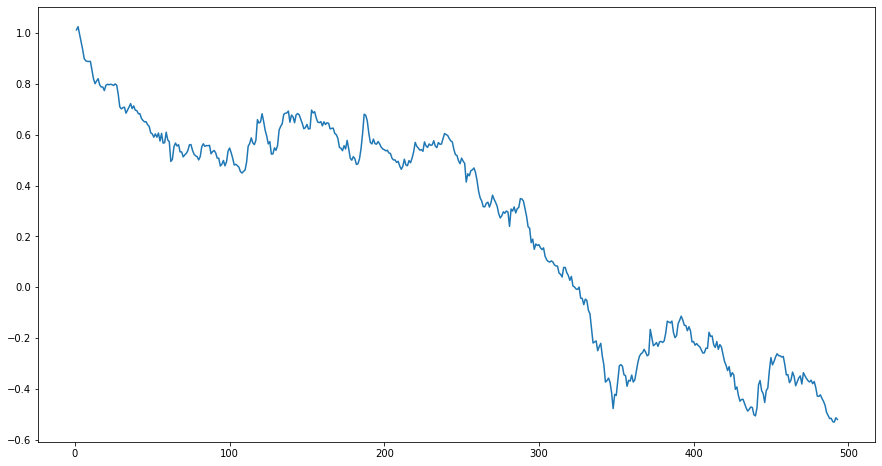

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(1+(df['oc']/100).cumsum())